###  Challenge compare decision trees and random forests

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Using data set from Titanic available on Kaggle (https://www.kaggle.com/azeembootwala/titanic)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore")

titanic = pd.read_csv('titanicbinary_data.csv')

titanic.head(10)

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.200,0.051,0,1,0,0.000,1,0,0,0,0,0,1
1,792,793,0,0,0.350,0.136,0,0,1,1.000,0,0,0,1,0,0,1
2,793,794,0,1,0.350,0.060,1,0,0,0.000,1,0,0,0,1,0,0
3,794,795,0,1,0.312,0.015,0,0,1,0.000,1,0,0,0,0,0,1
4,795,796,0,1,0.487,0.025,0,1,0,0.000,1,0,0,0,0,0,1
5,796,797,1,0,0.613,0.051,1,0,0,0.000,0,1,0,0,0,0,1
6,797,798,1,0,0.388,0.017,0,0,1,0.000,1,0,0,0,0,0,1
7,798,799,0,1,0.375,0.014,0,0,1,0.000,1,0,0,0,1,0,0
8,799,800,0,0,0.375,0.047,0,0,1,0.200,1,0,0,0,0,0,1
9,800,801,0,1,0.425,0.025,0,1,0,0.000,1,0,0,0,0,0,1


### 1) Explore and clean the data

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
Unnamed: 0     100 non-null int64
PassengerId    100 non-null int64
Survived       100 non-null int64
Sex            100 non-null int64
Age            100 non-null float64
Fare           100 non-null float64
Pclass_1       100 non-null int64
Pclass_2       100 non-null int64
Pclass_3       100 non-null int64
Family_size    100 non-null float64
Title_1        100 non-null int64
Title_2        100 non-null int64
Title_3        100 non-null int64
Title_4        100 non-null int64
Emb_1          100 non-null int64
Emb_2          100 non-null int64
Emb_3          100 non-null int64
dtypes: float64(3), int64(14)
memory usage: 13.4 KB


In [3]:
#Checking for NaN values
titanic.isnull().any()

Unnamed: 0     False
PassengerId    False
Survived       False
Sex            False
Age            False
Fare           False
Pclass_1       False
Pclass_2       False
Pclass_3       False
Family_size    False
Title_1        False
Title_2        False
Title_3        False
Title_4        False
Emb_1          False
Emb_2          False
Emb_3          False
dtype: bool

Data set is clean and already in binary form

### 2) Create a decision tree to model classification of survivors and non survivors



In [23]:
features=titanic[['Sex', 'Age', 'Pclass_1', 'Pclass_2','Pclass_3']]

In [24]:
#Create the data sets
X = features
Y = titanic['Survived']

#Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


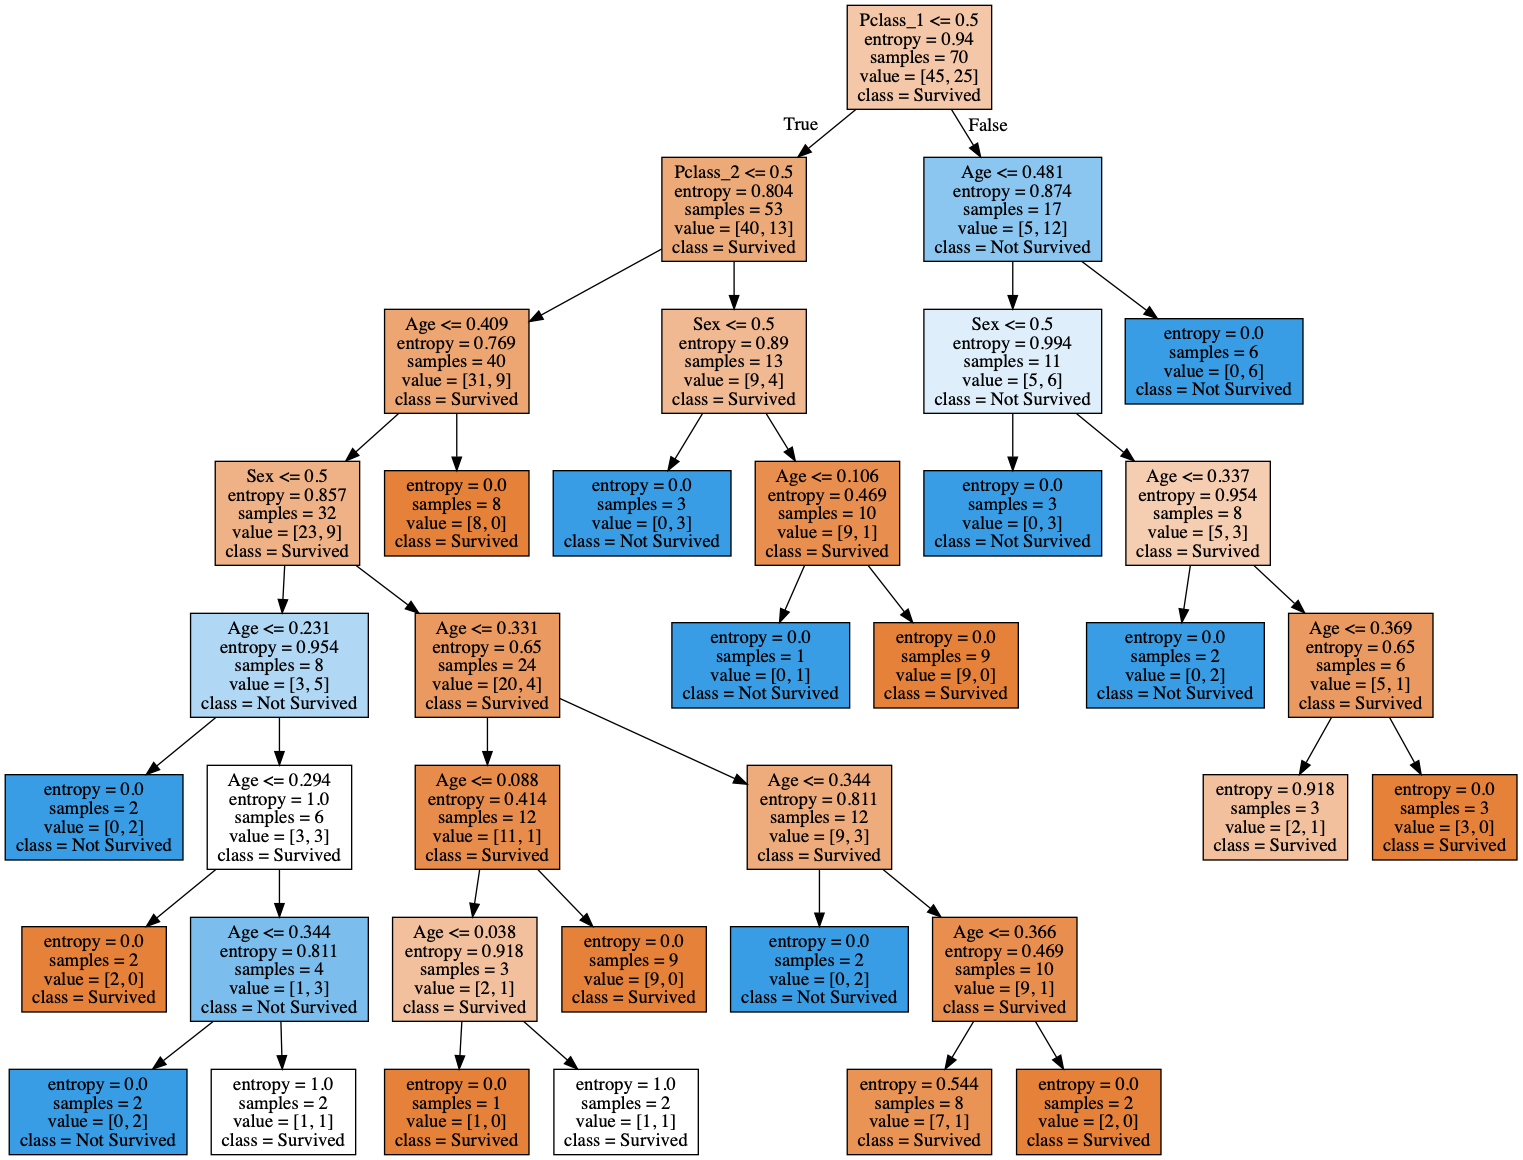

In [26]:
#This is the model we'll be using.
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz



# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy', 
    max_features=1,
    max_depth=7,
    random_state = 0
)
decision_tree.fit(X_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Survived', 'Not Survived'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_predict=decision_tree.predict(X_test)

print('accuracy score:', accuracy_score(y_test, y_predict))
print('confusion matrix: ' , confusion_matrix(y_test, y_predict))

accuracy score: 0.7666666666666667
confusion matrix:  [[14  5]
 [ 2  9]]


This is the best model thus far; previsou versions had accuracy score of .66, .7 and .73 respectively. 

### 3) Now build a random forecast model using the decision tree model above

In [28]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = features
Y = titanic['Survived']

cross_val_score(rfc, X, Y, cv=10)

array([0.81818182, 0.81818182, 0.63636364, 0.90909091, 0.8       ,
       0.7       , 0.77777778, 0.88888889, 1.        , 0.77777778])